Psalter analysis 2.2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm
import patsy
import seaborn as sns

In [2]:
pslt = pd.read_csv('/Users/jAir/jarod347/PsalterData2.2.csv', header = 1, index_col=1)

FileNotFoundError: File b'/Users/jAir/jarod347/PsalterData2.2.csv' does not exist

In [7]:
pslt

,2,Label_Origin,Label_Location,Orig_Lat,Orig_Long,Orig_Region,Date_Early,Date_Late,VirgChrist,GeezFidel,...,CaluMarks,CaluSum,QuireNos,Mirrors,Seals,Covers,Cloth,Strap,Coder,Complete
ID_1,,,,,,,,,,,,,,,,,,,,,
Berlin Or 172,3.0,NaN,NaN,NaN,NaN,NaN,1400.0,1499.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Steve,1.0
Beta Metsahaf BGV-008,4.0,NaN,NaN,NaN,NaN,NaN,1900.0,1974.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Steve,1.0
Beta Metsahaf MNC-002,5.0,NaN,NaN,NaN,NaN,NaN,1900.0,1974.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Steve,1.0
Beta Metsahaf MNC-015,6.0,NaN,NaN,NaN,NaN,NaN,1800.0,1849.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,Steve,1.0
Beta Metsahaf MNC-017,7.0,NaN,NaN,NaN,NaN,NaN,1800.0,1899.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,Steve,1.0
Beta Metsahaf MNC-019,8.0,NaN,NaN,NaN,NaN,NaN,1850.0,1949.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,Steve,1.0
BN Abbadie 105,9.0,NaN,NaN,NaN,NaN,NaN,1468.0,1478.0,0.0,0.0,...,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Steve,1.0
BN Eth 10,10.0,NaN,NaN,NaN,NaN,NaN,1400.0,1499.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Steve,1.0
BN Eth 11,11.0,NaN,NaN,NaN,NaN,NaN,1400.0,1499.0,0.0,0.0,...,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Steve,1.0


In [3]:
pslt1 = pslt.loc[pslt['Complete'] == 1]


conditions = [
    (pslt1['Date_Early'] < 1400),
    (pslt1['Date_Early'] < 1500),
    (pslt1['Date_Early'] < 1600),
    (pslt1['Date_Early'] < 1700),
    (pslt1['Date_Early'] < 1800),
    (pslt1['Date_Early'] < 1900),
    (pslt1['Date_Early'] < 2000)]
choices = ['14th', '15th', '16th', '17th', '18th', '19th', '20th']
pslt1['century'] = np.select(conditions, choices, default='other')

conditions = [
    (pslt1['Orig_Region'] == 'Shewa'),
    (pslt1['Orig_Region'] == 'Tigray'),
    (pslt1['Orig_Region'] == 'Gojjam'),
    (pslt1['Orig_Region'] == 'Wello'),
    (pslt1['Orig_Region'] == 'Begemder'),
    (pslt1['Orig_Region'] == 'Egypt')]
choices = ['b', 'g', 'r', 'c', 'm', 'y']
pslt1['color'] = np.select(conditions, choices, default='k')
pslt1

NameError: name 'pslt' is not defined

In [9]:
pslt2 = pslt1.loc[pslt1['Date_Early'] > 1]
pslt2

,2,Label_Origin,Label_Location,Orig_Lat,Orig_Long,Orig_Region,Date_Early,Date_Late,VirgChrist,GeezFidel,...,QuireNos,Mirrors,Seals,Covers,Cloth,Strap,Coder,Complete,century,color
ID_1,,,,,,,,,,,,,,,,,,,,,
Berlin Or 172,3.0,NaN,NaN,NaN,NaN,NaN,1400.0,1499.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Steve,1.0,15th,k
Beta Metsahaf BGV-008,4.0,NaN,NaN,NaN,NaN,NaN,1900.0,1974.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,Steve,1.0,20th,k
Beta Metsahaf MNC-002,5.0,NaN,NaN,NaN,NaN,NaN,1900.0,1974.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Steve,1.0,20th,k
Beta Metsahaf MNC-015,6.0,NaN,NaN,NaN,NaN,NaN,1800.0,1849.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,Steve,1.0,19th,k
Beta Metsahaf MNC-017,7.0,NaN,NaN,NaN,NaN,NaN,1800.0,1899.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,Steve,1.0,19th,k
Beta Metsahaf MNC-019,8.0,NaN,NaN,NaN,NaN,NaN,1850.0,1949.0,0.0,0.0,...,1.0,0.0,0.0,2.0,1.0,0.0,Steve,1.0,19th,k
BN Abbadie 105,9.0,NaN,NaN,NaN,NaN,NaN,1468.0,1478.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,Steve,1.0,15th,k
BN Eth 10,10.0,NaN,NaN,NaN,NaN,NaN,1400.0,1499.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Steve,1.0,15th,k
BN Eth 11,11.0,NaN,NaN,NaN,NaN,NaN,1400.0,1499.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,Steve,1.0,15th,k


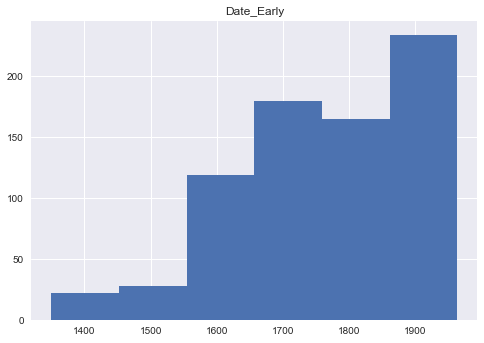

In [10]:
pslt2.hist(column='Date_Early', bins=6)
plt.show()

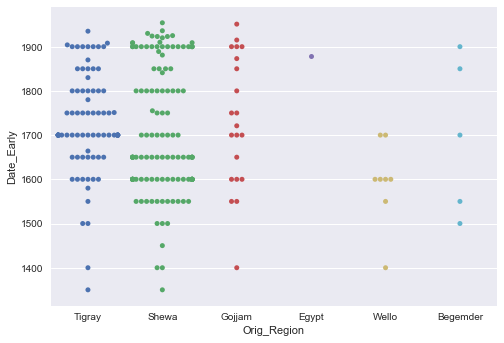

In [11]:
sns.swarmplot(x='Orig_Region', y='Date_Early', data=pslt2)
plt.show()

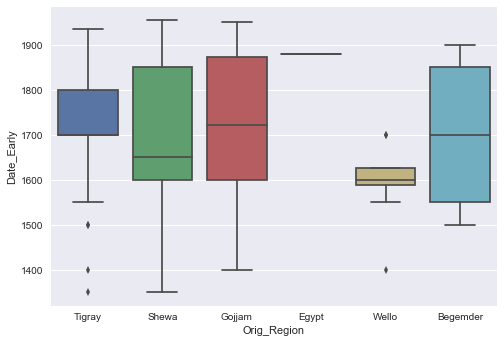

In [12]:
sns.boxplot(x='Orig_Region', y='Date_Early', data=pslt2)
plt.show()

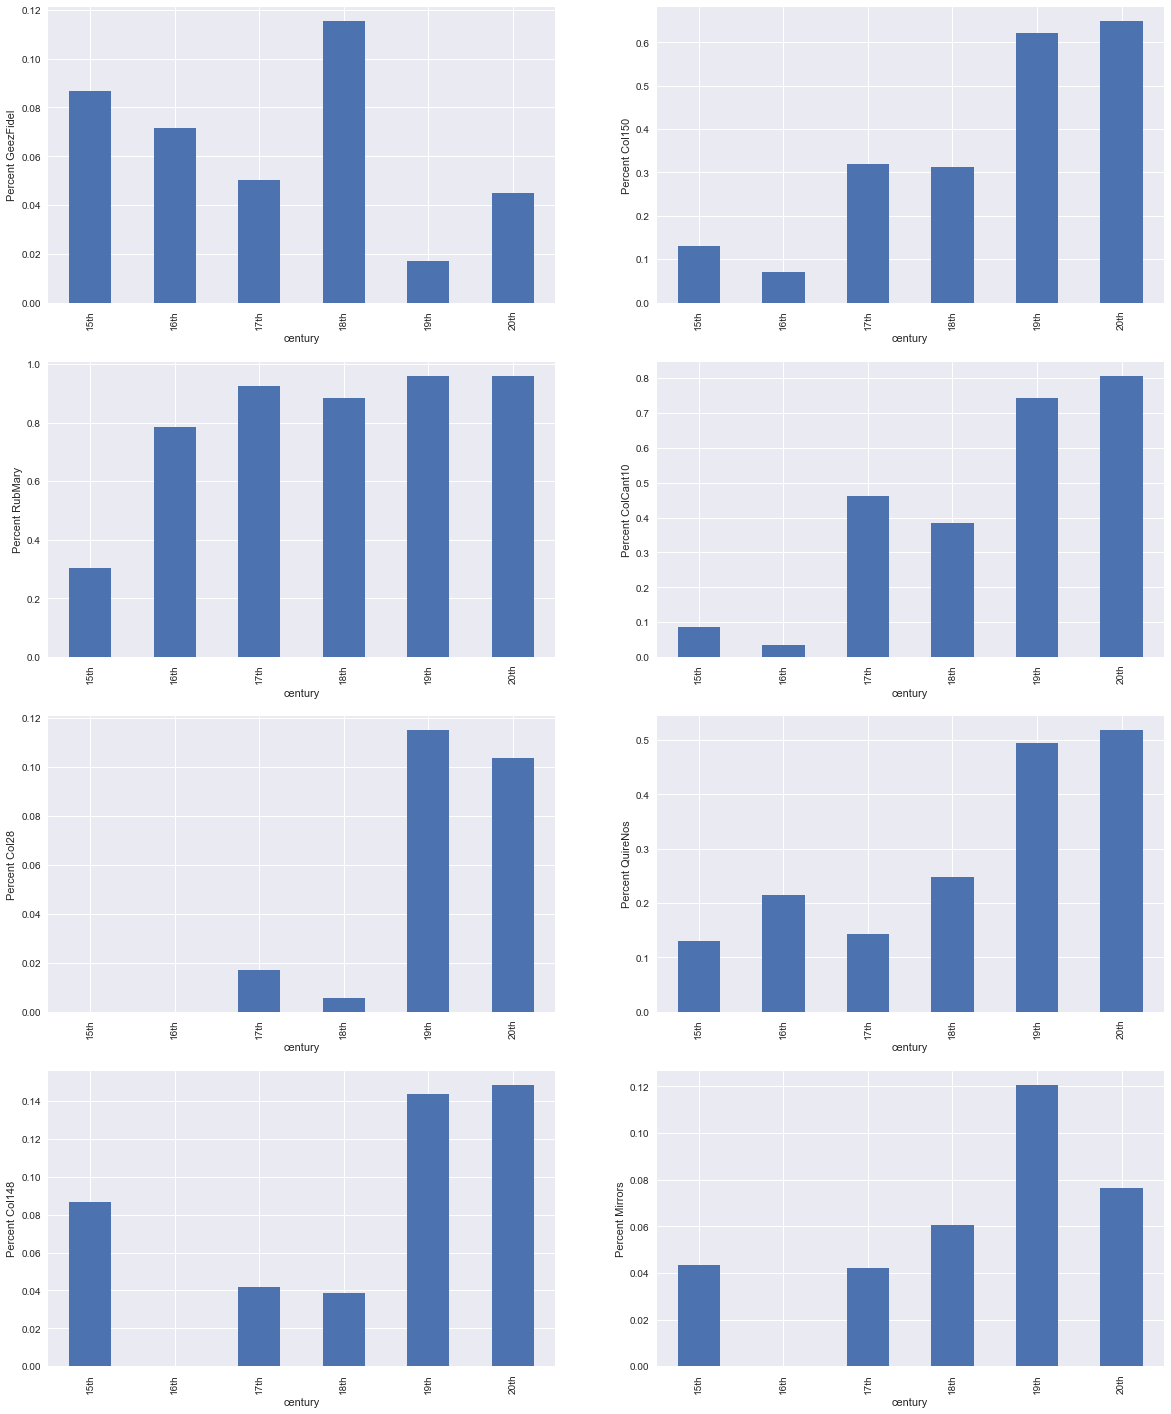

In [13]:
fig, axes = plt.subplots(4,2,figsize=(20,25))

ax1 = pslt2.GeezFidel.groupby(pslt2.century).mean().plot(kind='bar', ax=axes[0,0])
ax1.set_ylabel("Percent GeezFidel")

ax2 = pslt2.RubMary.groupby(pslt2.century).mean().plot(kind='bar', ax=axes[1,0])
ax2.set_ylabel("Percent RubMary")

ax3 = pslt2.Col28.groupby(pslt2.century).mean().plot(kind='bar', ax=axes[2,0])
ax3.set_ylabel("Percent Col28")

ax4 = pslt2.Col148.groupby(pslt2.century).mean().plot(kind='bar', ax=axes[3,0])
ax4.set_ylabel("Percent Col148")

ax5 = pslt2.Col150.groupby(pslt2.century).mean().plot(kind='bar', ax=axes[0,1])
ax5.set_ylabel("Percent Col150")

ax6 = pslt2.ColCant10.groupby(pslt2.century).mean().plot(kind='bar', ax=axes[1,1])
ax6.set_ylabel("Percent ColCant10")

ax7 = pslt2.QuireNos.groupby(pslt2.century).mean().plot(kind='bar', ax=axes[2,1])
ax7.set_ylabel("Percent QuireNos")

ax8 = pslt2.Mirrors.groupby(pslt2.century).mean().plot(kind='bar', ax=axes[3,1])
ax8.set_ylabel("Percent Mirrors")


plt.show()

In [14]:
pslt2.Orig_Region.value_counts()

Shewa       122
Tigray       81
Gojjam       21
Wello         8
Begemder      5
Egypt         1
Name: Orig_Region, dtype: int64

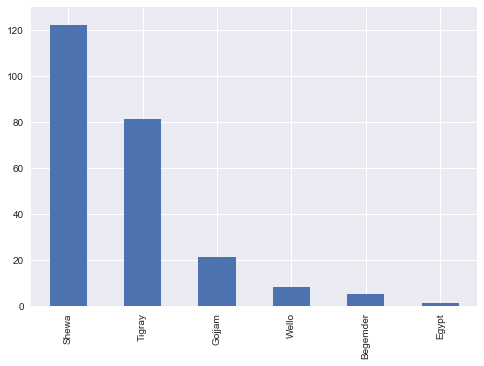

In [15]:
ax1 = pslt2.Orig_Region.value_counts().plot('bar')
ax1.set_ylim(0, 130)
sns.set()

plt.show()

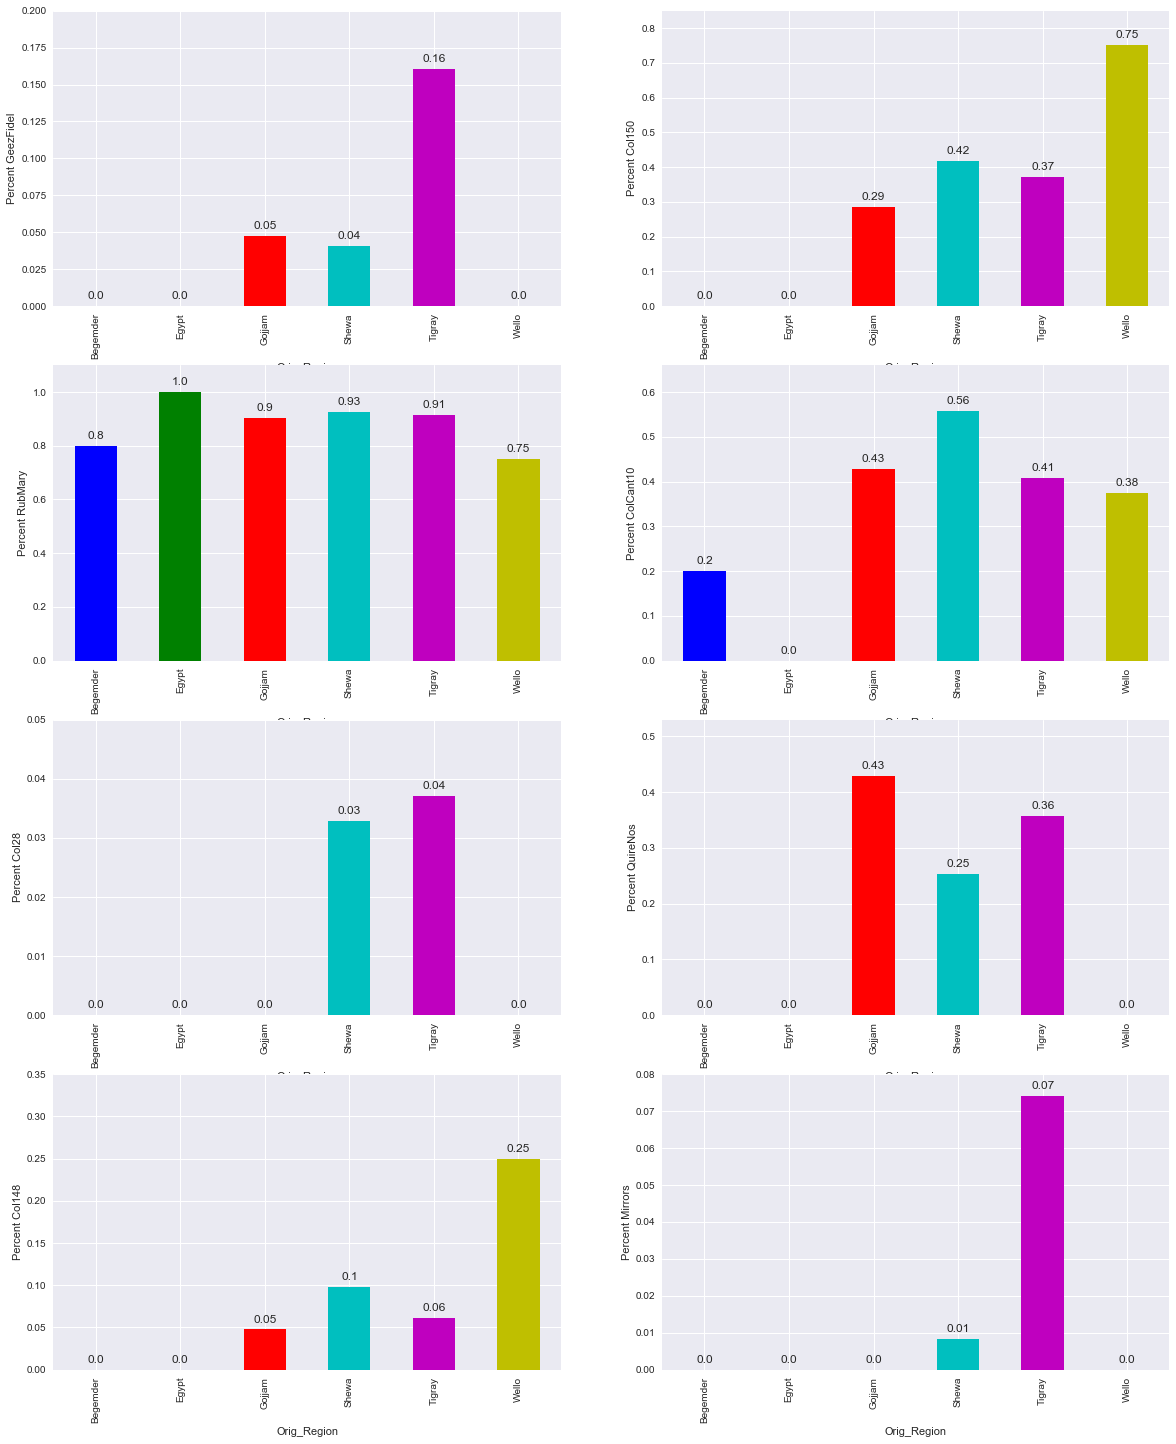

In [16]:
fig, axes = plt.subplots(4,2,figsize=(20,25))

ax1 = pslt2.GeezFidel.groupby(pslt2.Orig_Region).mean().plot(kind='bar', ax=axes[0,0],
                                                            color = ['b', 'g', 'r', 'c', 'm', 'y'])
ax1.set_ylabel("Percent GeezFidel")
ax1.set_ylim(0, 0.20)
for p in ax1.patches: ax1.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
ax2 = pslt2.RubMary.groupby(pslt2.Orig_Region).mean().plot(kind='bar', ax=axes[1,0],
                                                            color = ['b', 'g', 'r', 'c', 'm', 'y'])
ax2.set_ylabel("Percent RubMary")
ax2.set_ylim(0, 1.1)
for p in ax2.patches: ax2.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax3 = pslt2.Col28.groupby(pslt2.Orig_Region).mean().plot(kind='bar', ax=axes[2,0],
                                                            color = ['b', 'g', 'r', 'c', 'm', 'y'])
ax3.set_ylabel("Percent Col28")
ax3.set_ylim(0, 0.05)
for p in ax3.patches: ax3.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax4 = pslt2.Col148.groupby(pslt2.Orig_Region).mean().plot(kind='bar', ax=axes[3,0],
                                                            color = ['b', 'g', 'r', 'c', 'm', 'y'])
ax4.set_ylabel("Percent Col148")
ax4.set_ylim(0, 0.35)
for p in ax4.patches: ax4.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax5 = pslt2.Col150.groupby(pslt2.Orig_Region).mean().plot(kind='bar', ax=axes[0,1],
                                                            color = ['b', 'g', 'r', 'c', 'm', 'y'])
ax5.set_ylabel("Percent Col150")
ax5.set_ylim(0, 0.85)
for p in ax5.patches: ax5.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax6 = pslt2.ColCant10.groupby(pslt2.Orig_Region).mean().plot(kind='bar', ax=axes[1,1],
                                                            color = ['b', 'g', 'r', 'c', 'm', 'y'])
ax6.set_ylabel("Percent ColCant10")
ax6.set_ylim(0, 0.66)
for p in ax6.patches: ax6.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax7 = pslt2.QuireNos.groupby(pslt2.Orig_Region).mean().plot(kind='bar', ax=axes[2,1],
                                                            color = ['b', 'g', 'r', 'c', 'm', 'y'])
ax7.set_ylabel("Percent QuireNos")
ax7.set_ylim(0, 0.53)
for p in ax7.patches: ax7.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax8 = pslt2.Mirrors.groupby(pslt2.Orig_Region).mean().plot(kind='bar', ax=axes[3,1],
                                                            color = ['b', 'g', 'r', 'c', 'm', 'y'])
ax8.set_ylabel("Percent Mirrors")
ax8.set_ylim(0, 0.08)
for p in ax8.patches: ax8.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.set()

plt.show()

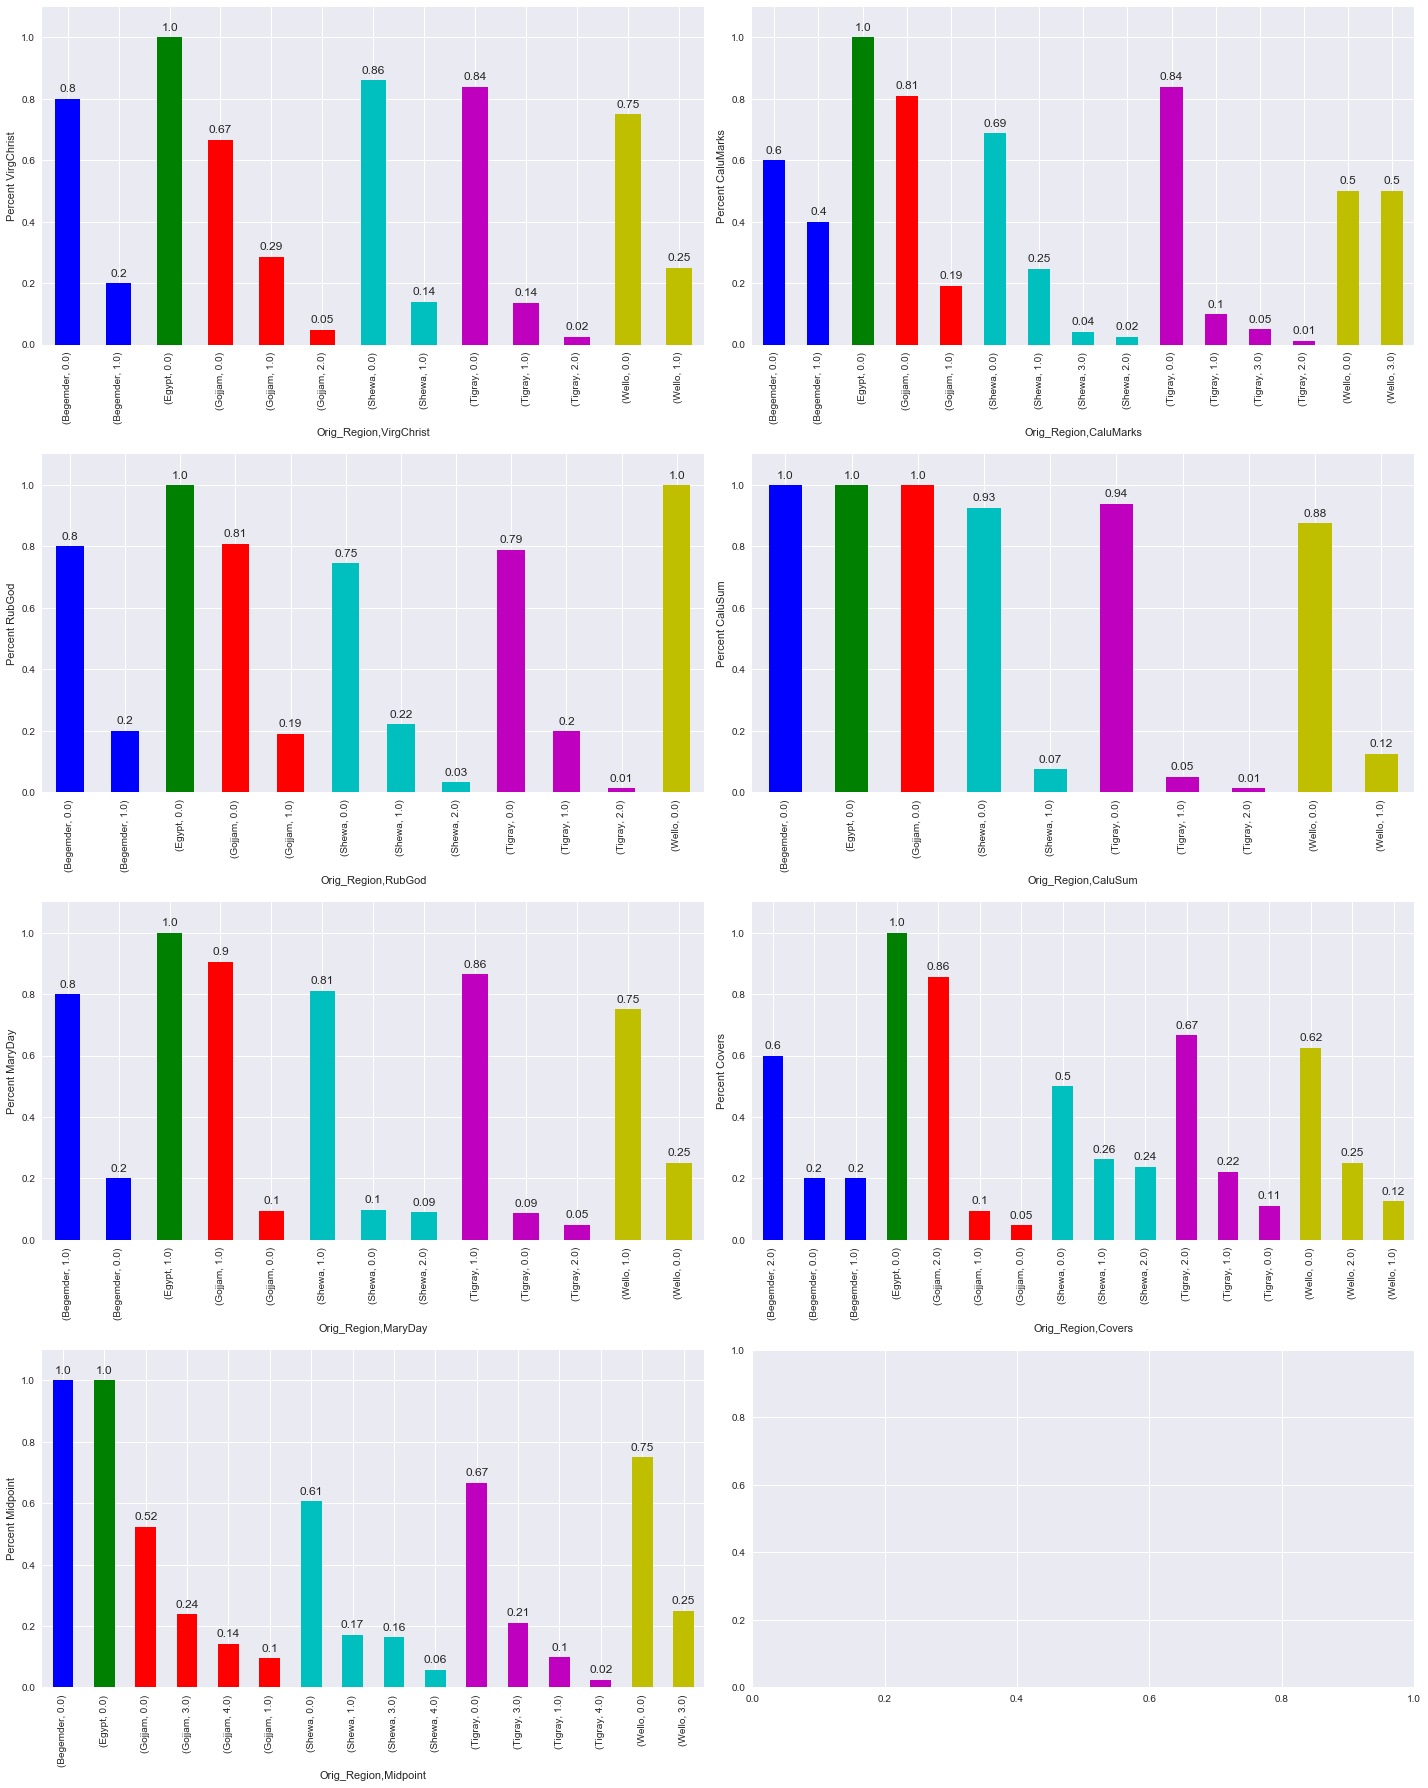

In [17]:
fig, axes = plt.subplots(4,2,figsize=(20,25))
'b', 'g', 'r', 'c', 'm', 'y'
ax1 = pslt2.VirgChrist.groupby(pslt2.Orig_Region).value_counts(normalize=True).plot(kind = 'bar', 
    ax=axes[0,0], color = ['b', 'b', 'g', 'r', 'r', 'r', 'c', 'c', 'm', 'm', 'm', 'y', 'y'])
ax1.set_ylabel("Percent VirgChrist")
ax1.set_ylim(0, 1.1)
for p in ax1.patches: ax1.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax2 = pslt2.RubGod.groupby(pslt2.Orig_Region).value_counts(normalize=True).plot(kind = 'bar', 
    ax=axes[1,0], color = ['b', 'b', 'g', 'r', 'r', 'c', 'c', 'c', 'm', 'm', 'm', 'y'])
ax2.set_ylabel("Percent RubGod")
ax2.set_ylim(0, 1.1)
for p in ax2.patches: ax2.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax3 = pslt2.MaryDay.groupby(pslt2.Orig_Region).value_counts(normalize=True).plot(kind = 'bar', 
    ax=axes[2,0], color = ['b', 'b', 'g', 'r', 'r', 'c', 'c', 'c', 'm', 'm', 'm', 'y', 'y'])
ax3.set_ylabel("Percent MaryDay")
ax3.set_ylim(0, 1.1)
for p in ax3.patches: ax3.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax4 = pslt2.Midpoint.groupby(pslt2.Orig_Region).value_counts(normalize=True).plot(kind = 'bar', 
    ax=axes[3,0], color = ['b', 'g', 'r', 'r', 'r', 'r', 'c', 'c', 'c', 'c', 'm', 'm', 'm', 'm', 'y', 'y'])
ax4.set_ylabel("Percent Midpoint")
ax4.set_ylim(0, 1.1)
for p in ax4.patches: ax4.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax5 = pslt2.CaluMarks.groupby(pslt2.Orig_Region).value_counts(normalize=True).plot(kind = 'bar', 
    ax=axes[0,1], color = ['b', 'b', 'g', 'r', 'r', 'c', 'c', 'c', 'c', 'm', 'm', 'm', 'm', 'y', 'y'])
ax5.set_ylabel("Percent CaluMarks")
ax5.set_ylim(0, 1.1)
for p in ax5.patches: ax5.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax6 = pslt2.CaluSum.groupby(pslt2.Orig_Region).value_counts(normalize=True).plot(kind = 'bar', 
    ax=axes[1,1], color = ['b', 'g', 'r', 'c', 'c', 'm', 'm', 'm', 'y', 'y'])
ax6.set_ylabel("Percent CaluSum")
ax6.set_ylim(0, 1.1)
for p in ax6.patches: ax6.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax7 = pslt2.Covers.groupby(pslt2.Orig_Region).value_counts(normalize=True).plot(kind = 'bar', 
    ax=axes[2,1], color = ['b', 'b', 'b', 'g', 'r', 'r', 'r', 'c', 'c', 'c', 'm', 'm', 'm', 'y', 'y', 'y'])
ax7.set_ylabel("Percent Covers")
ax7.set_ylim(0, 1.1)
for p in ax7.patches: ax7.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.set()

plt.tight_layout()
plt.show()

In [18]:
pslt2.VirgChrist.groupby(pslt2.Orig_Region).value_counts(normalize=True)

Orig_Region  VirgChrist
Begemder     0.0           0.800000
             1.0           0.200000
Egypt        0.0           1.000000
Gojjam       0.0           0.666667
             1.0           0.285714
             2.0           0.047619
Shewa        0.0           0.860656
             1.0           0.139344
Tigray       0.0           0.839506
             1.0           0.135802
             2.0           0.024691
Wello        0.0           0.750000
             1.0           0.250000
Name: VirgChrist, dtype: float64

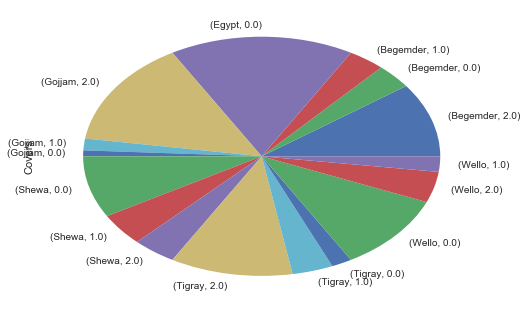

In [19]:
pslt2.Covers.groupby(pslt2.Orig_Region).value_counts(normalize=True).plot(kind = 'pie')
plt.show()

In [20]:
gordf = pslt2.Covers.groupby(pslt2.Orig_Region).value_counts(normalize=True)

df = pd.DataFrame([gordf]).T
df

Covers
Orig_Region Covers          
Begemder    2.0     0.600000
            0.0     0.200000
            1.0     0.200000
Egypt       0.0     1.000000
Gojjam      2.0     0.857143
            1.0     0.095238
            0.0     0.047619
Shewa       0.0     0.500000
            1.0     0.262295
            2.0     0.237705
Tigray      2.0     0.666667
            1.0     0.222222
            0.0     0.111111
Wello       0.0     0.625000
            2.0     0.250000
            1.0     0.125000

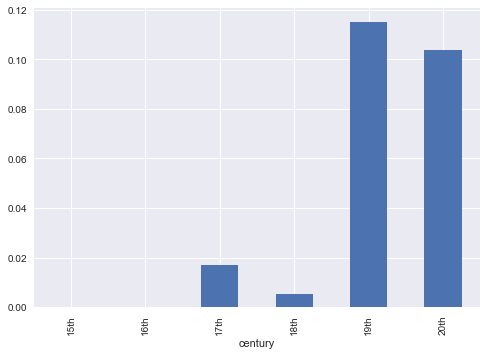

In [21]:
pslt2.Col28.groupby(pslt2.century).mean().plot(kind='bar')
plt.show()

In [22]:
conditions = [
    (pslt2['Date_Early'] < 1800),
    (pslt2['Date_Early'] >= 1800)]
choices = ['Pre 19th', 'Post 19th']
pslt2['centtemp'] = np.select(conditions, choices, default='other')

pslt2.Col28.groupby(pslt2.centtemp).count()
df = pd.DataFrame([pslt2.centtemp.groupby(pslt2.Col28).value_counts()])
df

/Users/jAir/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Col28          0.0                1.0         
centtemp Post 19th Pre 19th Post 19th Pre 19th
centtemp       353      349        43        3

In [23]:
z_score, p_value = sm.stats.proportions_ztest([43, 3], [349, 353])
print(z_score)
print(p_value)

6.141030906872419
8.198762804433087e-10


In [24]:
df = pd.DataFrame([pslt2.century.groupby(pslt2.Col28).value_counts()])
z_score, p_value = sm.stats.proportions_ztest(
    [(df.iloc[0,6]+df.iloc[0,7]), (df.iloc[0,8]+df.iloc[0,9])], 
    [(df.iloc[0,0]+df.iloc[0,3]+df.iloc[0,6]+df.iloc[0,7]), 748-(df.iloc[0,0]+df.iloc[0,3]+df.iloc[0,6]+df.iloc[0,7])])
print(z_score,p_value)

6.373759084241425 1.8445026205370626e-10


In [25]:
ps = pslt2.century.groupby(pslt2.Col28).value_counts()

In [26]:
ps

Col28  century
0.0    20th       199
       18th       181
       19th       154
       17th       117
       16th        28
       15th        23
1.0    20th        23
       19th        20
       17th         2
       18th         1
Name: century, dtype: int64

In [27]:
pd.DataFrame({'Col28':ps.index, 'century':ps.values})

,Col28,century
0,"(0.0, 20th)",199
1,"(0.0, 18th)",181
2,"(0.0, 19th)",154
3,"(0.0, 17th)",117
4,"(0.0, 16th)",28
5,"(0.0, 15th)",23
6,"(1.0, 20th)",23
7,"(1.0, 19th)",20
8,"(1.0, 17th)",2
9,"(1.0, 18th)",1


In [28]:
df = ps.to_frame().reset_index()

ValueError: cannot insert century, already exists

In [29]:
df.sum(axis=1)

century    748
dtype: int64

In [30]:
sns.pairplot(pslt2)
plt.show()

/Users/jAir/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/jAir/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.